## Data Profiling
The first step of both the Cross Industry Process for Data Mining (CRISP-DM) and the Microsoft Team Data Science Process (TDSP), is understanding the business case for the project. In other words, what problem exists that could be solved if a value could be predicted? The next step is to source and understand data that pertains to the business case. This activity (data profiling) is aimed at identifying the shape of the dataset (i.e., the number of observations and features), the data types of its features, their meaning, the number of unique values contained within each feature, and the distribution of those values. In doing so it is typical to find the data in a raw form; i.e., the data is likely to be flawed to some extent that it would require preparatory measures before it could be used to train a machine learning model. Foremost among flaws are missing data. An analysis must be performed to decide whether to impute missing data, or to simply drop features or observations that have missing values. This decision is typically driven by quantifying how much data would remain if those missing features and/or observations were excluded. This is because any treatment applied to impute replacement values may influence all subsequent activities to understand the true distribution of values within the affected features, and to identify correlations among those features.

#### Import Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#### Import the Data

In [2]:
data_dir = os.path.join(os.getcwd(), 'Data')
source_data_file = 'titanic.csv';

data_file = os.path.join(data_dir, source_data_file)
df = pd.read_csv(data_file, header=0, index_col=0)

# Ensure the index values are: seed=1, increment=1
df.reset_index(drop=True, inplace=True)

### Perform an Initial Profile
#### How much data do we have, and what does it look like?

In [3]:
print(f"Shape: {df.shape[0]} Observations x {df.shape[1]} Features")

Shape: 1309 Observations x 13 Features


In [4]:
df.head()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Here we see that the Target variable (survived) contains binary numeric values; making this a classification experiment. We can see that the **sex** feature also contains binary values, although they are textual. We already observe missing values (NaN) in both the **boat** and **body** features, and we see that multiple entities are contained in the **home.dest** feature. Finally, we observe the **name** feature uniquely identifies each observation (passenger) and is therefore of no consequence to predicting whether a new (unseen) passenger would be likely to survive or perish.

#### Inspect each feature's data type

In [5]:
df.dtypes

survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

#### How many unique values exist per feature?

In [6]:
df.nunique()

survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         181
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

Here we observe that, although there are 1309 observations in our datset, there are only 1307 unique values in the **name** feature. This indicates that we have a couple of duplicate observations; therefore, we may wish to remove those duplicates.

#### Inspect each feature's unique values

In [7]:
unique_values = []
for col in df.columns:
    unique_values.append(df[col].unique())

pd.DataFrame(list(zip(df.columns, unique_values)), columns=['Feature', 'Unique Values'])

,Feature,Unique Values
0,survived,"[1, 0]"
1,name,"[Allen, Miss. Elisabeth Walton, Allison, Maste..."
2,sex,"[female, male]"
3,age,"[29.0, 0.9167, 2.0, 30.0, 25.0, 48.0, 63.0, 39..."
4,sibsp,"[0, 1, 2, 3, 4, 5, 8]"
5,parch,"[0, 2, 1, 4, 3, 5, 6, 9]"
6,ticket,"[24160, 113781, 19952, 13502, 112050, 11769, P..."
7,fare,"[211.3375, 151.55, 26.55, 77.9583, 0.0, 51.479..."
8,cabin,"[B5, C22, E12, D7, A36, C101, nan, C62, B35, A..."
9,embarked,"[S, C, nan, Q]"


### Quantify Any Missing Data
#### How many missing values are there per feature?

In [8]:
df.isnull().sum().sort_values(ascending=True)

survived        0
name            0
sex             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        2
age           263
home.dest     564
boat          823
cabin        1014
body         1188
dtype: int64

Text(0.5, 1.0, 'Quantifying Missing Data (Counts)')

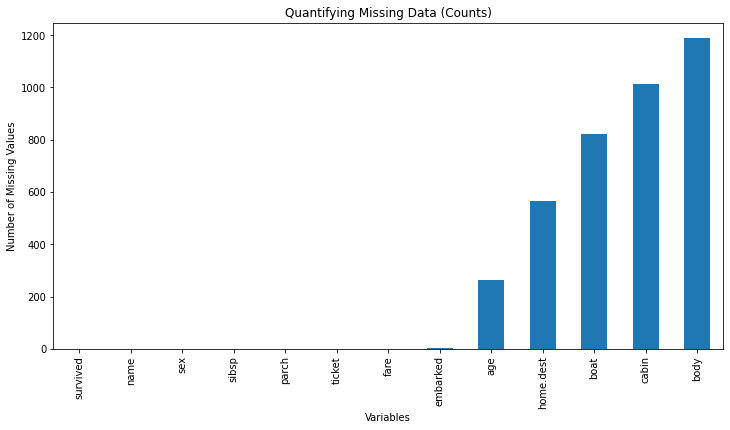

In [9]:
df.isnull().sum().sort_values(ascending=True).plot.bar(figsize=(12,6))
plt.ylabel('Number of Missing Values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data (Counts)')

#### What percentage of values are missing per feature?

In [10]:
df.isnull().mean().sort_values(ascending=True)

survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

Text(0.5, 1.0, 'Quantifying Missing Data (Percentage)')

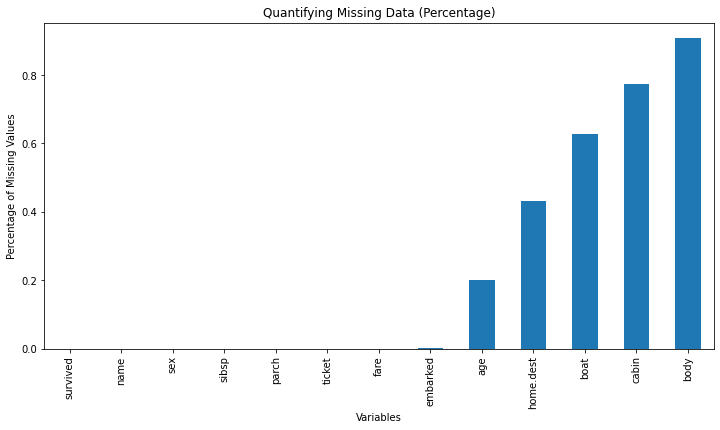

In [11]:
df.isnull().mean().sort_values(ascending=True).plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data (Percentage)')

From these execises we can clearly see that 5 of the 13 features contain a significant number (or percentage) of missing values: age (0.20%), home.dest (0.43%), boat (0.63%), cabin (0.77%), body (0.91%). As the percentage of missing values exceeds 50% we may ask ourselves if enough data remains in those features to impute new values using the mean, median or mode of the remaining observations. What's more, we would have to wonder if these features would be influential even if they were complete.


#### Separate Numerical and Categorical Features
Because numerical values often tend to be continuous while categorical values are inherently discrete, it is advantageous to separate them to make it easier to apply appropriate visualization techniques and/or feature engineering techniques.

In [12]:
numerical_cols = [col for col in df.columns if df.dtypes[col] != 'O']
categorical_cols = [col for col in df.columns if col not in numerical_cols]

#### Evaluate the Statistical Distribution of the Numerical Features

In [13]:
df[numerical_cols].describe()

,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6a83f3f40>,
      dtype=object)

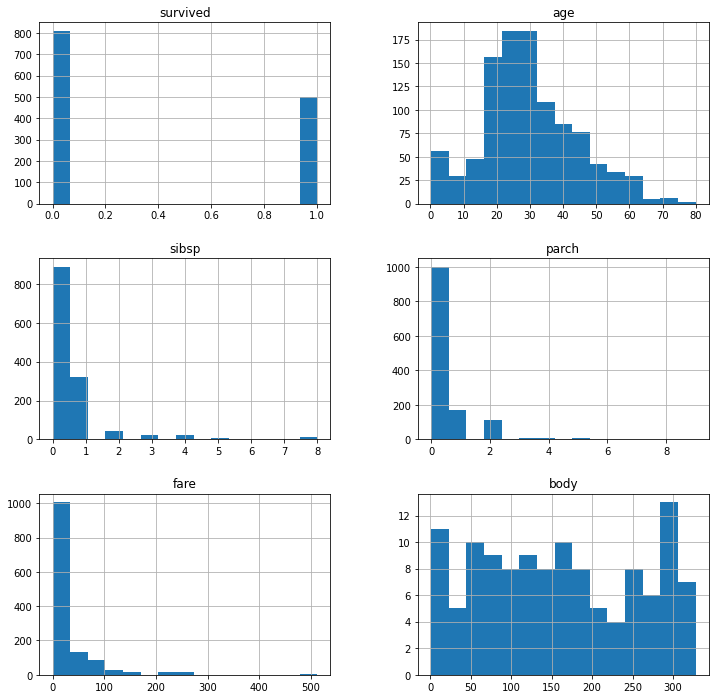

In [14]:
df[numerical_cols].hist(figsize=(12,12), bins=15)

#### Identify Any Outliers
An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside an upper boundary, *defined as 75th quantile + (IQR * 1.5)*, or a lower boundary, *defined as 25th quantile - (IQR * 1.5)*, where the inter-quantile range (IQR) is defined as *(75th quantile - 25th quantile)*.

In the boxplots displayed below, the **IQR** is indicated by the (inner) box, the **median** is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers mark the **proximity rule boundaries** as described above. Values that fall outside the whiskers are considered outliers; however, further analysis may be required to determine if these values are in fact erroneous, or if they represent the general truth.

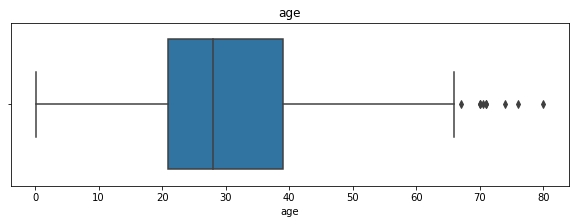

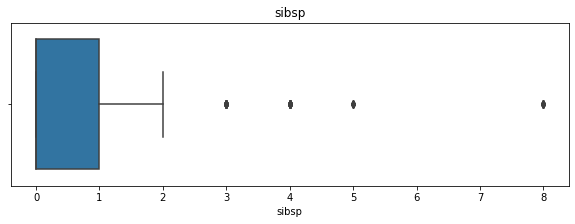

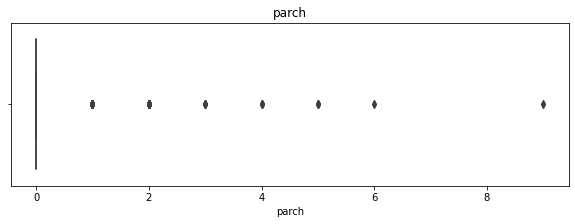

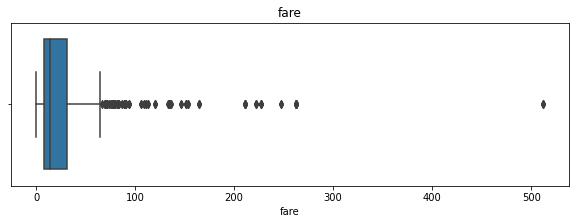

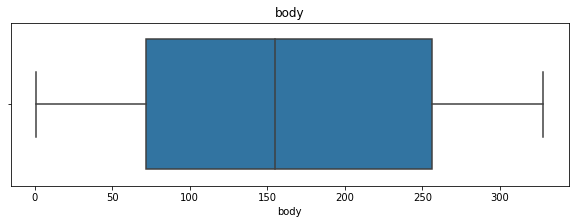

In [15]:
numerical_cols.remove('survived')
for col in numerical_cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=df[col])
    plt.title(col)

In [16]:
df[categorical_cols].head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22,S,NaN,"Montreal, PQ / Chesterville, ON"


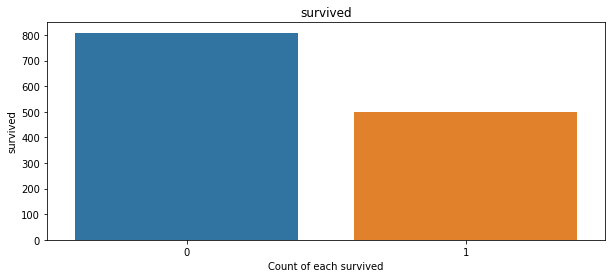

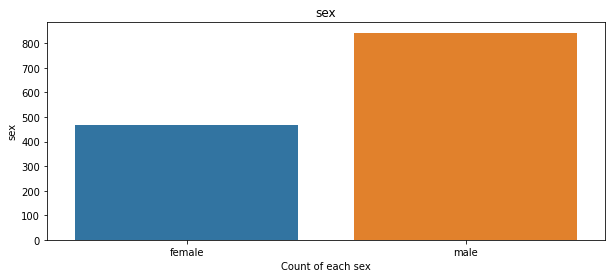

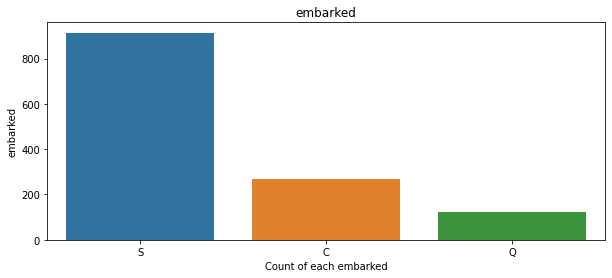

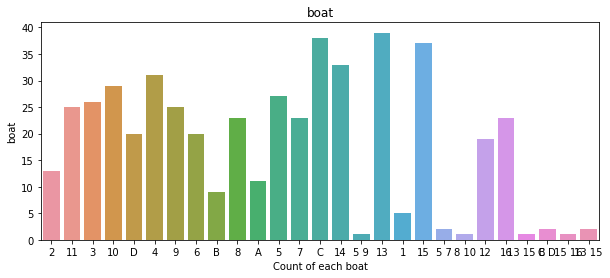

In [17]:
cols = df[['survived','sex','embarked','boat']]

for col in cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xlabel("Count of each {0}".format(col))
    plt.ylabel(col)
    plt.show()